In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#CIFAR_10 is a set of 60,000 images that are 32x32 pixels on 3 channels.
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#Constants
NUM_TO_AUGMENT = 5
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [10]:
#load Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
#Augmenting
print("Augmenting training set images....")
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
xtas, ytas = [], []
for i in range(X_train.shape[0]): 
    num_aug = 0 
    x = X_train[i] # (3, 32, 32) 
    x = x.reshape((1,) + x.shape) # (1, 3, 32, 32) 

    for x_aug in datagen.flow(x, batch_size=1, save_to_dir ='preview', save_prefix='cifar', save_format='jpeg'): 
        if num_aug >= NUM_TO_AUGMENT: 
            break 
        xtas.append(x_aug[0]) 
        num_aug += 1

Augmenting training set images....


In [12]:
#Convert to Categorical
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES) 

#Float and Normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
#Network
model = Sequential()
model.add(Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))  # Use Input to define the input shape
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                      

In [18]:
#Fit the Dataset
datagen.fit(X_train)

#Train
history = model.fit(datagen.flow(X_train, Y_train,
batch_size=BATCH_SIZE),
epochs=NB_EPOCH, verbose=VERBOSE)

Epoch 1/20
391/391 [==============================] - 71s 181ms/step - loss: 1.3883 - accuracy: 0.5025
Epoch 2/20
391/391 [==============================] - 74s 189ms/step - loss: 1.3379 - accuracy: 0.5210
Epoch 3/20
391/391 [==============================] - 73s 186ms/step - loss: 1.3052 - accuracy: 0.5354
Epoch 4/20
391/391 [==============================] - 73s 188ms/step - loss: 1.2786 - accuracy: 0.5478
Epoch 5/20
391/391 [==============================] - 72s 185ms/step - loss: 1.2512 - accuracy: 0.5539
Epoch 6/20
391/391 [==============================] - 74s 188ms/step - loss: 1.2311 - accuracy: 0.5645
Epoch 7/20
391/391 [==============================] - 71s 182ms/step - loss: 1.2110 - accuracy: 0.5709
Epoch 8/20
391/391 [==============================] - 71s 182ms/step - loss: 1.2011 - accuracy: 0.5764
Epoch 9/20
391/391 [==============================] - 72s 183ms/step - loss: 1.1890 - accuracy: 0.5820
Epoch 10/20
391/391 [==============================] - 73s 187ms/step - l

In [29]:
#Fit the Dataset
datagen.fit(X_train)


#Train
history = model.fit(datagen.flow(X_train, Y_train,
batch_size=BATCH_SIZE), steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
epochs=NB_EPOCH, verbose=VERBOSE, 
validation_data=(X_test, Y_test))

Epoch 1/20
390/390 [==============================] - 77s 197ms/step - loss: 1.1472 - accuracy: 0.6054 - val_loss: 1.0130 - val_accuracy: 0.6540
Epoch 2/20
390/390 [==============================] - 79s 201ms/step - loss: 1.1522 - accuracy: 0.6040 - val_loss: 1.1279 - val_accuracy: 0.6241
Epoch 3/20
390/390 [==============================] - 76s 193ms/step - loss: 1.1528 - accuracy: 0.6053 - val_loss: 0.8621 - val_accuracy: 0.7012
Epoch 4/20
390/390 [==============================] - 78s 200ms/step - loss: 1.1563 - accuracy: 0.6043 - val_loss: 0.9353 - val_accuracy: 0.6852
Epoch 5/20
390/390 [==============================] - 77s 198ms/step - loss: 1.1574 - accuracy: 0.6050 - val_loss: 0.9830 - val_accuracy: 0.6590
Epoch 6/20
390/390 [==============================] - 76s 195ms/step - loss: 1.1572 - accuracy: 0.6041 - val_loss: 0.9179 - val_accuracy: 0.6997
Epoch 7/20
390/390 [==============================] - 79s 201ms/step - loss: 1.1665 - accuracy: 0.6025 - val_loss: 0.9293 - val_ac

In [30]:
#Evaluate
score = model.evaluate(X_test, Y_test, 
batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10.weights.h5', overwrite=True)

79/79 [==============================] - 1s 16ms/step - loss: 1.5046 - accuracy: 0.5535

Test score: 1.5046148300170898
Test accuracy: 0.5534999966621399


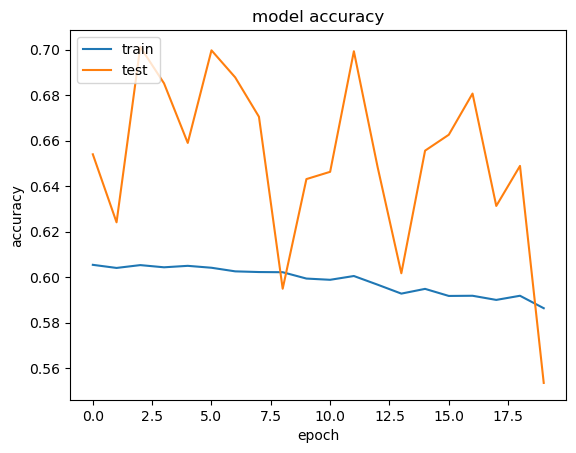

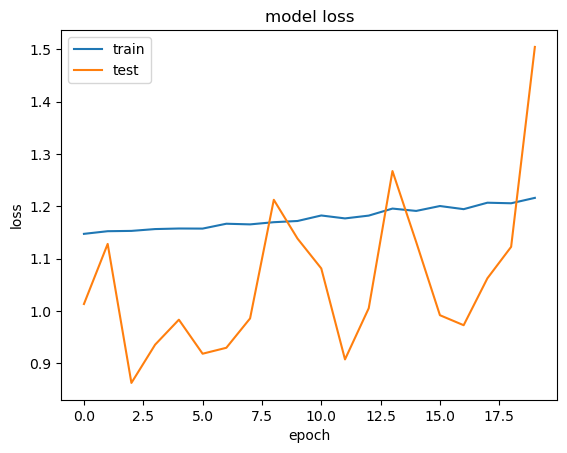

In [33]:
#Summarize History For Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Summarize History For Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()